# Homework 5

### Name: Maida Raza
### Collaborator:


DATA 201

Summer 2025

Tufts University

This homework explores KNN, Decision Trees, and Random Forests. The first question reviews training a KNN model. Subsequent questions provide an in-depth examination of Gini impurity and the mechanics of training a Decision Tree. Following this, we delve into basic implementations of both Decision Trees and Random Forests, accompanied by an introduction to tuning hyperparameters.

In [254]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


## Question 1:

(a) Load the Heart Disease dataset and name it 'df'. Conduct data cleaning.

- Perform any data cleaning or data transformation steps if required
- Explain some of the data cleaning steps which you can perform on **any** data set

For clarification, please find the metadata below:
- BPMeds: whether or not the patient was on blood pressure medication
- prevalentStroke: whether or not the patient had previously had a stroke
- prevalentHyp: whether or not the patient was hypertensive
- diabetes: whether or not the patient had diabetes
- totChol: total cholesterol level
- sysBP: systolic blood pressure
- diaBP: diastolic blood pressure
- BMI: Body Mass Index
- heartRate: heart rate
- glucose: glucose level
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) (Predictor Variable)

(b) Create two dataframes for features and target variable (TenYearCHD). Conduct a full model training and testing (30%) for a KNN model with K=5. Print the accuracy, confusion matrix, and explain what the confuison matrix tells you

(c) Create a range from 1 to 50 going at steps of 2 then make a list where you will store average accuracy at each k value
use a for loop to compute the average accuracy over 10-fold cross validation for each k value. Plot the average accuracy for each k values and determine which k value you will choose.

### Q1(a)

* Perform the data cleaning steps, as described above.

In [255]:
#Q1. Load the Heart Disease dataset and name it 'df'. 
df = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Heart Disease Data.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [256]:
# 1. Conduct data cleaning and explain 

# Check for missing observations
missing_observations = df.isnull().sum()

# Check the data type for each column
data_type = df.dtypes

# Duplicated rows
duplicates = df.duplicated().sum()

summary = pd.DataFrame({
    'Missing Values': missing_observations,
    'Data Type': data_type,
    'Duplicates': duplicates
})

summary

,Missing Values,Data Type,Duplicates
male,0,int64,0
age,0,int64,0
education,105,float64,0
currentSmoker,0,int64,0
cigsPerDay,29,float64,0
BPMeds,53,float64,0
prevalentStroke,0,int64,0
prevalentHyp,0,int64,0
diabetes,0,int64,0
totChol,50,float64,0


### Data Cleaning Comments and Next Steps:

* I performed the data cleaning steps and here are the key insights:

    1. Missing Data: Checking for missing data and deciding how to handle it (replace with mean/median). 
        - Missing observations for: cigsPerDay, BPMeds, TotalCol, BMI, Heartrate, Glucose. Will replace the missing observations with the column median. I will drop the column Glucose as that has many missing observations

    2. Check for duplicates: Check for and remove any duplicates
        - No duplicates were found in any features

    3. Data Type: Ensure that columns with string/integer variables have consistent data type
        - Data type seems consistent for every feature

    4. Outlier Detection: Identify and address outliers

    5. Dropping Irrelevant Features: Remove the columns not useful for our analysis


In [257]:
# filling in missing observations with their column median
df.fillna(df.median(numeric_only=True), inplace=True) # putting inplace because we want to replace values without creating new copies
df.drop('glucose', axis='columns') # need to specify axis = 'rows/column

# Verify that all columns have been cleaned
cleaned_df = df.isnull().sum()
cleaned_df 



male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64



The data cleaning process is complete. All missing values have been filled using the median, and there are no remaining missing values in the dataset.

---

### Q1(b):

* Create two dataframes for features and target variable (TenYearCHD). Conduct a full model training and testing (30%) for a KNN model with K=5. Print the accuracy, confusion matrix, and explain what the confusion matrix tells you

In [258]:
# Q1. b. Create two dataframes for features and target variable (TenYearCHD). In here, I will assume that all other columns are the predictor variables
# Conduct a full model training and testing (30%) for a KNN model with K=5. Print the accuracy, confusion matrix, and explain what the confusion matrix tells you

y = df['TenYearCHD']
x = df.drop('TenYearCHD', axis= 'columns')

# Standardize the feature data - transforming the data to have zero mean and unit variance. This helps improve performance for algorithms like KNN, Vector Machines, and Gradient Boost.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# Dividing into test and train data
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=42)

# Now running the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_predict = knn_model.predict(x_test)

# Calculating confusion matrix and the accuracy score
con_mat = confusion_matrix(y_test, y_predict)
acc_score = accuracy_score(y_test, y_predict)

print(f'Confusion Matrix is {con_mat}')
print(f'Accuracy Score is {acc_score}')



Confusion Matrix is [[1045   39]
 [ 168   20]]
Accuracy Score is 0.8372641509433962


### Confusion Matrix Analysis:

1. Accuracy Score:
    - The model has an accuracy score of 0.8372641509433962, meaning that the KNN model achieved an accuracy of ~84% on the test dataset.

2. Confusion Matrix: I will assume that negative means the patient not getting CHD (0) and positive means the patient getting CHD (1)

    - Here we were using the KNN model to predict the risk of coronary heart disease, given a sample of data. Our model learned from the x_train dataset to create predictions shown in the Confusion Matrix above.
    - True Negative: KNN model accurately predicts 1045 instances of patient not getting CHD (0). 
    - False Positive: KNN model inaccurately predicted 39 instances of patient getting CHD (1) when the actual outcome is 0.
    - False Negative: KNN model inaccurately predicted that 168 patients wont get CHD when the actual outcome is 1, meaning that they will get CHD
    - True Positive: KNN model accurately predicted 20 patient getting CHD, who will actually get it.

The model performs well in determining individuals without risk, but it struggles with identifying individuals at risk of getting CHD, reflected in a high False Negative number. This suggests potential class imbalance in the dataset.

### Q1(c):

* Create a range from 1 to 50 going at steps of 2 then make a list where you will store average accuracy at each k value
use a for loop to compute the average accuracy over 10-fold cross validation for each k value. Plot the average accuracy for each k values and determine which k value you will choose.

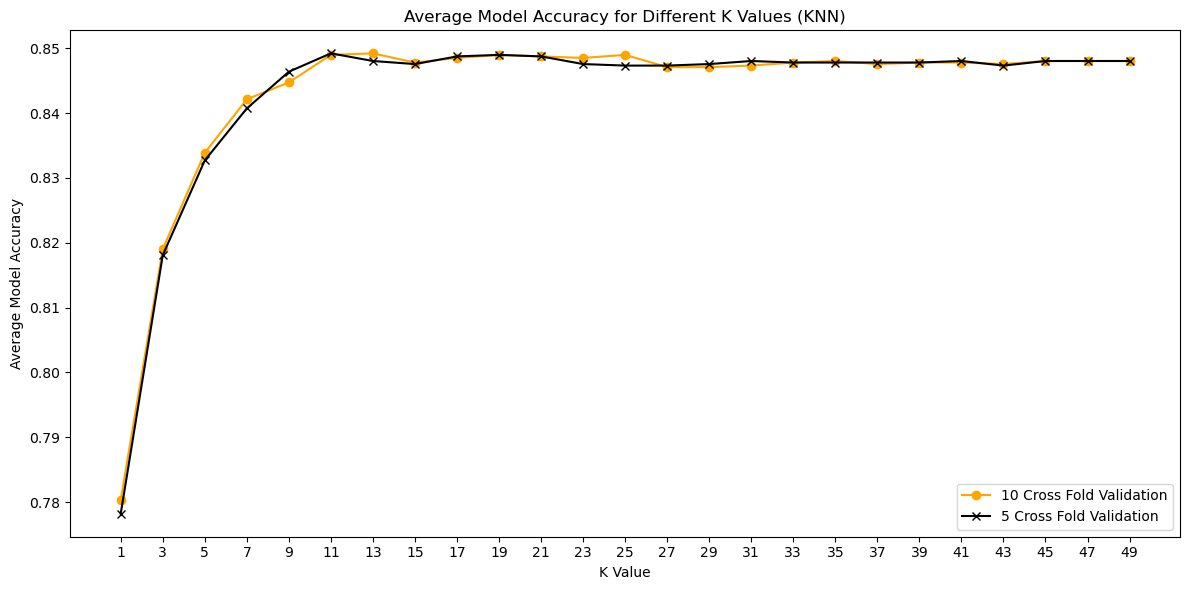

Best K-Value at 5-Fold is 11 
Best K-Value at 10-Fold is 13 


In [259]:
# Create a range from 1 to 50 going at steps of 2 then make a list where you will store average accuracy at each k value
# use a for loop to compute the average accuracy over 10-fold cross validation for each k value. Plot the average accuracy for each k values and determine which k value you will choose.
# I am also curious to know if 10 cross validation is better than 5 fold cross validation

from sklearn.model_selection import cross_val_score # evaluates model performance through cross validation, divides the data into test and split and calculates the score. 
k_values = range(1,51,2)
average_accuracy_10 = []
average_accuracy_5 = []
k_vals = []

for k in k_values:
    k_vals.append(k)
    model = KNeighborsClassifier(n_neighbors=k)
    score_10 = cross_val_score(model, scaled_data, y, cv=10)
    score_5 = cross_val_score(model, scaled_data, y, cv=5)
    average_accuracy_10.append(score_10.mean())
    average_accuracy_5.append(score_5.mean())
    
# Creating the plot now - essentially we are trying to see which k-values give us the best score
plt.figure(figsize=(12,6))
plt.plot(k_vals, average_accuracy_10, marker = 'o', color = 'orange', label = '10 Cross Fold Validation')
plt.plot(k_vals, average_accuracy_5, marker = 'x', color = 'black', label = '5 Cross Fold Validation')
plt.title('Average Model Accuracy for Different K Values (KNN)')
plt.xlabel('K Value')
plt.ylabel('Average Model Accuracy')
plt.xticks(k_vals)
plt.legend()
plt.tight_layout()
plt.show()

# best KValues
bestK_10fold = k_values[average_accuracy_10.index(max(average_accuracy_10))]
bestK_5fold = k_values[average_accuracy_5.index(max(average_accuracy_5))]
print(f'Best K-Value at 5-Fold is {bestK_5fold} ')
print(f'Best K-Value at 10-Fold is {bestK_10fold} ')



---

## Question 2

* The goal of Q2 is to make a function that can calculate the weighted gini impurity over any grouping and any size of classes.

    (a) Calculate the gini impurity of the example by hand. Then write some code to do it for you. You will have to find $p_0$ and $p_1$ which are the probabilities of selecting a 0 and a 1 (respectively) from the group.

    (b) Now say we have two groups? Calculate the gini index of each group. Now, make a weighted sum of the gini numbers, each weighted by the proportion of the group size to the total number of entries (i.e. if group 1 is of length 10 and group 2 is of length 15, then group 1 would have a weight of 2/5 and group 2 a weight of 3/5).

    (c) Generalize that bit of code you wrote to now deal with any number of groups with any number of classes. Assume the groups will be given as a list of lists, and if there is an empty group the gini number will be 0 (there needs to be an if statement to make sure we do not divide by 0).

    (d) Make that bit of code into a function called gini_imp which takes a 'groups' variable and a 'classes' variable. It should return the gini index. Note, you need to use the classes variable because that is how you know what classes to check for in each group. Test it on the same example from part (c)

### Q2(a)

* Calculate the gini impurity of the example by hand. Then write some code to do it for you. You will have to find $p_0$ and $p_1$ which are the probabilities of selecting a 0 and a 1 (respectively) from the group.


In [260]:
#Q2 (a)

###This is the example
classes = [0,1]
group = [0,0,0,1,1,0,1,0,0]


In [261]:
# 2(a) Gini Impurity tells us how often a randomly chosen data point would be misclassified
# Code for calculating Gini Impurity for the data above:
# This function takes the total length of a group, accesses the data observations inside it and then assign probabilities

def gini_impurity(group):

    sample_size = len(group)
    zeros = group.count(0)
    ones = group.count(1)

    p0 = (zeros / sample_size) ** 2
    p1 = (ones / sample_size) ** 2
    
    Gini_Impurity = 1 - (p0 + p1)
    return Gini_Impurity

group = [0, 0, 0, 1, 1, 0, 1, 0, 0]
gini_impurity(group)


0.4444444444444444

### Q2(a) - By Hand:

The Gini Impurity measures the impurity or heterogeneity of a group. It is calculated using the formula:

Gini Impurity = 1 - (p0^2 + p1^2)

Where:
* p0 is the probability of selecting a 0 from the group.
* p1 is the probability of selecting a 1 from the group.

Given the group: [0, 0, 0, 1, 1, 0, 1, 0, 0]
* Total number of elements: n = 9
* Number of 0's: n0 = 6
* Number of 1's: n1 = 3

Now we can find the probabilities:
* p0 = n0/n = 6/9 = 0.6667
* p1 = n1/n = 3/9 = 0.3333

Using the formula Gini Impurity = 1 - (p0^2 + p1^2):
* Gini Impurity = 1 - (0.6667^2 + 0.3333^2)
* Gini Impurity = 1 - (0.4444 + 0.1111) = 1 - 0.5555 = 0.4444

Thus, the Gini Impurity of the group = [0, 0, 0, 1, 1, 0, 1, 0, 0] is 0.4444.

* Gini impurity = 0 (perfectly pure)
* Gini Impurity = 0.5 (Maximum Impurity)


----

### Q2(b)

* Now say we have two groups? Calculate the gini index of each group. Now, make a weighted sum of the gini numbers, each weighted by the proportion of the group size to the total number of entries (i.e. if group 1 is of length 10 and group 2 is of length 15, then group 1 would have a weight of 2/5 and group 2 a weight of 3/5).


In [262]:
# 2(b) Now say we have two groups. Calculate the gini index of each group. Now, make a weighted sum of the gini numbers, each weighted by the proportion of the group size to the total number of entries 
# # (i.e. if group 1 is of length 10 and group 2 is of length 15, then group 1 would have a weight of 2/5 and group 2 a weight of 3/5).

classes = [0,1]
groups =([0, 0, 0, 1], [0, 0, 1, 1])

def gini_impurity(groups):
    total_length = 0
    total_weighted_gini = []
    gini_index = 0
    gini_sum = 0
    
    for m in groups:
        total_length += len(m)
    
    for i in groups:
        group_len = len(i)
        zeros = i.count(0)
        ones = i.count(1)
        p_0 = (zeros / group_len ) **2
        p_1 = (ones/group_len) ** 2
        gini_index = (1 - (p_0 + p_1))
        weight = group_len / total_length
        weighted_gini_index = (weight) * gini_index
        total_weighted_gini.append(weighted_gini_index)
        
    for p in total_weighted_gini:
        gini_sum += p
    print(f'Weighted Gini Index is {gini_sum}')

gini_impurity(groups)
    
    


Weighted Gini Index is 0.4375


---

### Q2(c)

* Generalize that bit of code you wrote to now deal with any number of groups with any number of classes. Assume the groups will be given as a list of lists, and if there is an empty group the gini number will be 0 (there needs to be an if statement to make sure we do not divide by 0).


In [263]:
# 2(c) Generalize that bit of code you wrote to now deal with any number of groups with any number of classes. 
# Assume the groups will be given as a list of lists, and if there is an empty group the gini number will be 0 (there needs to be an if statement to make sure we do not divide by 0).

classes = [0,1,2,3]
groups =[[0,3,1,1,1],[0,0,0,1],[2,3,1,1],[],[0,0,1,1,2,2]]

def gini_impurity(groups, classes):
    
    total_length = 0
    gini_index = 0
    
    for m in groups:
        total_length += len(m) # you are getting the total length of the set
    print(total_length) # total length, i.e., data observations in the set. For coder checking purposes only
    
    for i in groups:
        if len(i) != 0:
            group_length = len(i)
            probabilities = [i.count(c) for c in classes]
            group_weight = group_length / total_length
        
            for p in probabilities:
                calculation = (p/group_length) ** 2
                gini = calculation * group_weight
                gini_index = gini_index + gini
        else:
            gini_index += 0
    print(f'Gini Index is {1-gini_index:.4f}')

gini_impurity(groups, classes)

19
Gini Index is 0.5684


### Q2(d)

* Make that bit of code into a function called gini_imp which takes a 'groups' variable and a 'classes' variable. It should return the gini index. Note, you need to use the classes variable because that is how you know what classes to check for in each group. Test it on the same example from part (c)

In [264]:
# 2(d) Make that bit of code into a function called gini_imp which takes a 'groups' variable and a 'classes' variable. 
# It should return the gini index. Note, you need to use the classes variable because that is how you know what classes to check for in each group. Test it on the same example from part (c)

def gini_imp(groups, classes):
    def gini_impurity(groups, classes):
    
        total_length = 0
        total_weighted_gini = []
        gini_sum = 0
        
        for m in groups:
            total_length = len(m) + total_length # you are getting the total length of the set
        print(total_length) # total length, i.e., data observations in the set. For coder checking purposes
        
        for i in groups:
            if len(i) != 0:
                group_length = len(i)
                probabilities = [i.count(c) for c in classes]
                group_weight = group_length / total_length
            
                for p in probabilities:
                    calculation = (p/group_length) ** 2
                    gini = calculation * group_weight
                    gini_sum = gini_sum + gini
            else:
                gini_sum = 0 + gini_sum 
        return(1-gini_sum)
    return gini_impurity(groups, classes)

gini_index = gini_imp(groups, classes)
print(f'Gini Index: {gini_index:.4f}')

19
Gini Index: 0.5684


---

# Question 3

### Decision Tree

(a) Load the datasets titanic_train_data and titanic_test_data into dataframes and split them into X_train, X_test, y_train and y_test (the training sets are coming from the titanic train data and visa versa). Note, the first two columns should be deleted because they are just passenger Id's, also documentation about the data can be found here:https://www.kaggle.com/azeembootwala/titanic. Create a Decision Tree instance, fit the data on the training sets and get the accuracy score on the test set. Report the confusion matrix.

(b) Split the X_train and y_train data into sets called X_train,X_val, y_train, y_val using train_test_split. We are going to try and tune some parameters in the Decision tree. Call a new Decision Tree instance with the following parameters: **max_features, max_depth, and min_samples_leaf**. Choose some value to test them with, and run the model a few times to see if you can get different accuracy scores (use the X_val and y_val to get the accuracy scores). What do these parameters do? (Look them up in the documentation)

(c) We are going to use the validation sets to try and find the best parameter combinations. So, use a triple for loop to iterate over different ranges for each of the three parameters, find what combination gives the best accuracy on the validation set. Then, use that combination on a decision tree to classify the test set.

### Q3(a)

* (a) Load the datasets titanic_train_data and titanic_test_data into dataframes and split them into X_train, X_test, y_train and y_test (the training sets are coming from the titanic train data and visa versa). Note, the first two columns should be deleted because they are just passenger Id's, also documentation about the data can be found here:https://www.kaggle.com/azeembootwala/titanic. Create a Decision Tree instance, fit the data on the training sets and get the accuracy score on the test set. Report the confusion matrix.


In [265]:
'Decision Tree models can be used to analyze whether a customer will purchase a product based on their age, income, and purchase history.'
'In this one, you may start with income > 100k if advertising an expensive product. Decision tree can also be used for credit scoring and fraud detection'
'Tree Depth is the number of steps the algorithm takes to make a decision'

#Load the necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
train = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/train_data.csv')
test = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/test_data.csv')
train

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,788,0,1,0.1000,0.056848,0,0,1,0.5,0,0,1,0,0,1,0
788,788,789,1,1,0.0125,0.040160,0,0,1,0.3,0,0,1,0,0,0,1
789,789,790,0,1,0.5750,0.154588,1,0,0,0.0,1,0,0,0,1,0,0
790,790,791,0,1,0.3500,0.015127,0,0,1,0.0,1,0,0,0,0,1,0


In [266]:
#Checking if observations are missing

train_missing_observations = train.isnull().sum()
test_missing_observations = train.isnull().sum()

train_duplicates = train.duplicated()
test_duplicates = test.duplicated()

data = pd.DataFrame({
    'missing_observations': train_missing_observations,
    'test missing obs': test_missing_observations,
    'train duplicates': train_duplicates,
    'test duplicates': test_duplicates
})


# Dropping the first two columns
train = train.iloc[:, 2:]
test = test.iloc[:, 2:]

# Dividing the features
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']

x_test = test.drop('Survived', axis =1)
y_test = test['Survived']

# Building the Decision Tree Model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
y_test_predict = tree.predict(x_test)

# Getting Accuracy Score and Confusion Matrix on the Test Dataset
accuracy_score = accuracy_score(y_test, y_test_predict)
confusion_matrix = confusion_matrix(y_test, y_test_predict)

# Printing the output
print(f'The Accuracy Score for Decision Tree Model is {accuracy_score}')
print(f'The Confusion Matrix for Decision Tree Model is \n{confusion_matrix}')

The Accuracy Score for Decision Tree Model is 0.8
The Confusion Matrix for Decision Tree Model is 
[[52 12]
 [ 8 28]]


### Analysis:

1. Accuracy Score: 

    - The accuracy of the decision tree model on the titanic dataset is 0.8, meaning that the model is making correct predictions about passenger survival 80% of the time

2. Confusion Matrix

    - True Negative: 52 - for 52 observations, our model correctly identified people as not surviving
    - False Positive: 12 - for 12 observations, our model predicted people to survive, but they did not
    - False Negative: 8 - predicted 8 passengers to not survive when they actually survived
    - True Positive: 28 - predicted 28 passenger to survive when they actually survive



---

### Q3(b)

* Split the X_train and y_train data into sets called X_train,X_val, y_train, y_val using train_test_split. We are going to try and tune some parameters in the Decision tree. Call a new Decision Tree instance with the following parameters: **max_features, max_depth, and min_samples_leaf**. Choose some value to test them with, and run the model a few times to see if you can get different accuracy scores (use the X_val and y_val to get the accuracy scores). What do these parameters do? (Look them up in the documentation)


In [267]:
# 3(b) (b) Split the X_train and y_train data into sets called X_train,X_val, y_train, y_val using train_test_split. 
# We are going to try and tune some parameters in the Decision tree. Called a new Decision Tree instance with the following parameters: 
# **max_features, max_depth, and min_samples_leaf**. Choose some value to test them with, and run the model a few times to see if you can get different accuracy scores (use the X_val and y_val to get the accuracy scores). 
# What do these parameters do? (Look them up in the documentation)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt


x_train = train.drop('Survived', axis =1)
y_train = train['Survived']
#print(len(x_train), len(y_train))


X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

# Building New Decision Tree instance
# Max Depth: determines how many steps a decision tree takes. Note that the higher the depth, there is a chance of overfitting because the model trained too well
# Max Features: you set a number of features that the model should consider. The model, now decides which features are important. 
# Decision trees can overemphasize high-cardinality categorical features or numerical features with many possible splits
# Min Sample Leaf: A leaf note is the one where the tree stops and makes a prediction. Essentially, specifies the minimum number of observations that should be there before prediction

New_Tree = DecisionTreeClassifier(max_features='log2', max_depth=5, min_samples_leaf=8)
New_Tree.fit(x_train, y_train)
y_predict = New_Tree.predict(X_val)

acc_score = accuracy_score(Y_val, y_predict)
conf_matrix = confusion_matrix(Y_val, y_predict)
print(f'Confusion Matrix: \n{conf_matrix} \n Accuracy Score: {acc_score}')


# Printing the accuracy score
#print(f'Accuracy Score under Decision Tree Model (max_features=None, max_depth=5, min_samples_leaf=1) is {acc_score}') 0.87
#print(f'Accuracy Score under Decision Tree Model (max_features=None, max_depth=5, min_samples_leaf=8) is {acc_score}') 0.85 -> Score went down because I kept everything same, but required the model to have more instances before making a prediction
#print(f'Accuracy Score under Decision Tree Model (max_features=8, max_depth=8, min_samples_leaf=1) is {acc_score}') 0.89
#print(f'Accuracy Score under Decision Tree Model (max_features=None, max_depth=5, min_samples_leaf=8) is {acc_score}') 0.85






Confusion Matrix: 
[[224  21]
 [ 41 110]] 
 Accuracy Score: 0.8434343434343434


### Analysis:

With the chosen parameters, the accuracy score on the validation set is 84.3%.

Explanation of the Parameters:
* max_features: This parameter controls the number of features considered for splitting at each node. Using SQRT means that we are limiting the model to only consider a few features. This prevents overfitting
* max_depth: This parameter sets the maximum depth of the tree. Limiting the depth can prevent the model from becoming overly complex, reducing the risk of overfitting.
* min_samples_leaf: This defines the minimum number of samples required to be at a leaf node. By setting a higher value, we ensure that leaf nodes have more samples, which helps in creating a more generalized model.

---

### Q3(c)

* We are going to use the validation sets to try and find the best parameter combinations. So, use a triple for loop to iterate over different ranges for each of the three parameters, find what combination gives the best accuracy on the validation set. Then, use that combination on a decision tree to classify the test set.

In [268]:
# 3(c) We are going to use the validation sets to try and find the best parameter combinations. 
# So, use a triple for loop to iterate over different ranges for each of the three parameters, find what combination gives the best accuracy on the validation set. 
# Then, use that combination on a decision tree to classify the test set.

x_train = train.drop('Survived', axis =1)
y_train = train['Survived']
#print(len(x_train), len(y_train))


X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

# Building New Decision Tree instance
# Max Depth: determines how many steps a decision tree takes. Note that the higher the depth, there is a chance of overfitting because the model trained too well
# Max Features: you set a number of features that the model should consider. The model, now decides which features are important. 
# Decision trees can overemphasize high-cardinality categorical features or numerical features with many possible splits
# Min Sample Leaf: A leaf note is the one where the tree stops and makes a prediction. Essentially, specifies the minimum number of observations that should be there before prediction

for m in range(3,8):
    for j in range(6,11):
        New_Tree = DecisionTreeClassifier(max_depth=m, min_samples_leaf=j)
        New_Tree.fit(x_train, y_train)
        y_predict = New_Tree.predict(X_val)
        acc_score = accuracy_score(Y_val, y_predict)
        print(f'The Accuracy Score for Decision Tree at max_depth= {m}, min_samples_leaf= {j} is {acc_score}')


The Accuracy Score for Decision Tree at max_depth= 3, min_samples_leaf= 6 is 0.8560606060606061
The Accuracy Score for Decision Tree at max_depth= 3, min_samples_leaf= 7 is 0.8560606060606061
The Accuracy Score for Decision Tree at max_depth= 3, min_samples_leaf= 8 is 0.8560606060606061
The Accuracy Score for Decision Tree at max_depth= 3, min_samples_leaf= 9 is 0.8560606060606061
The Accuracy Score for Decision Tree at max_depth= 3, min_samples_leaf= 10 is 0.8560606060606061
The Accuracy Score for Decision Tree at max_depth= 4, min_samples_leaf= 6 is 0.8611111111111112
The Accuracy Score for Decision Tree at max_depth= 4, min_samples_leaf= 7 is 0.8611111111111112
The Accuracy Score for Decision Tree at max_depth= 4, min_samples_leaf= 8 is 0.8636363636363636
The Accuracy Score for Decision Tree at max_depth= 4, min_samples_leaf= 9 is 0.8636363636363636
The Accuracy Score for Decision Tree at max_depth= 4, min_samples_leaf= 10 is 0.8636363636363636
The Accuracy Score for Decision Tree a

In [269]:
# Another way of determining the best parameters

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

x_train = train.drop('Survived', axis =1)
y_train = train['Survived']
#print(len(x_train), len(y_train))


X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

# Defining the dataframe
param_dist = {
    'max_depth': list(range(3,8)),
    'max_features': ['sqrt', None, 'log2'],
    'min_samples_leaf': list(range(6,11)) 
}

# Defining the model
model = DecisionTreeClassifier()
random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_dist,
    cv =3,
    n_iter = 20,
    n_jobs = 1,
    scoring = 'accuracy'
)

# Fitting the model
random_search.fit(X_train, Y_train)

# Best parameter
print('Best Parameters Found:', random_search.best_params_)




Best Parameters Found: {'min_samples_leaf': 10, 'max_features': None, 'max_depth': 7}


### Analysis:

The best parameter combination found on the validation set is:
* max_features: None
* max_depth: 7
* min_samples_leaf: 9

This achieved a validation accuracy of 86.3%. There are a few models above that achieve an accuracy score of 87%. However, we should be vary of such high accuracy scores because that risks overfitting!

Now, I will use this combination to fit a Decision Tree on the training data and evaluate its performance on the test set. 

In [270]:
# **max_features, max_depth, and min_samples_leaf**. Choose some value to test them with, and run the model a few times to see if you can get different accuracy scores (use the X_val and y_val to get the accuracy scores). 
# What do these parameters do? (Look them up in the documentation)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x_train = train.drop('Survived', axis =1)
y_train = train['Survived']
#print(len(x_train), len(y_train))


X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

# Building New Decision Tree instance
# Max Depth: determines how many steps a decision tree takes. Note that the higher the depth, there is a chance of overfitting because the model trained too well
# Max Features: you set a number of features that the model should consider. The model, now decides which features are important. 
# Decision trees can overemphasize high-cardinality categorical features or numerical features with many possible splits
# Min Sample Leaf: A leaf note is the one where the tree stops and makes a prediction. Essentially, specifies the minimum number of observations that should be there before prediction

New_Tree = DecisionTreeClassifier(max_features=None, max_depth=7, min_samples_leaf=9)
New_Tree.fit(x_train, y_train)
y_predict = New_Tree.predict(X_val)

acc_score = accuracy_score(Y_val, y_predict)
conf_matrix = confusion_matrix(Y_val, y_predict)

print(f'Confusion Matrix {conf_matrix}')
print(f'Accuracy Score = {acc_score}')


Confusion Matrix [[222  23]
 [ 31 120]]
Accuracy Score = 0.8636363636363636


### Analysis:

Using the best parameter combination, the accuracy on the test set is 86.3%

The confusion matrix indicates:
* 222 true negatives compared with 52 for the prior model (correctly predicted as not survived)
* 23 false positives compared with 12 for the prior model (incorrectly predicted as survived)
* 31 false negatives compared with 8 in the prior model (incorrectly identified as not surviving)
* 120 true positive compared with 28 for the prior model 

This model performs well in both Confusion Matrix and Accuracy score when compared with the untuned Decision Tree.

---

# Question 4

Let's move onto random forests, we'll be doing more parameter tuning here.

(a) With the original train and test sets, run a Random Forest model on the data and report the accuracy score. How does it compare to the scores in Question 3?

(b) Create the train and validation sets again, and create a Random Forest Classifier with the following parameters: **n_estimators, max_leaf_nodes, max_depth**, with some values. What do this parameters do? (Again look up the documentation) Run the model and see how the accuracy changes. Change the values and try to get a higher accuracy.

(c) Find the best parameters for optimal in accuracy. How does this accuracy compare to the others we have seen?

Note: This kind of parameter optimization can be done using built in python functions, GridSearchCV and RandomSearchCV both are methods that take in some kind of range / distribution for the parameters and finds the best one (and uses cross validation which is a bonus).

# Random Forest Notes:

- Built from Decision Trees
- Trees are not flexible when it comes to classifying random samples
- You are selecting features and other things to build the boot-strapped dataset randomly
- Random Forests create multiple trees wit varying variables, which helps with its accuracy
- Then you run the data on every model, and determine yes and no outcomes for your hypothesis question
- Bagging: bootstrapping the data + using the data to make a decision. Typically, ~ 1/3 of the data does not end up in the test data. Out of bag dataset is what its called
- We can measure the accuracy of our Random Forest by the proportion of Out-of-Bag samples that were correctly classified by the RF. Incorrectly identified -> Out of Bag Error





### Q4(a)

(a) With the original train and test sets, run a Random Forest model on the data and report the accuracy score. How does it compare to the scores in Question 3?


In [271]:
# 4(a) With the original train and test sets, run a Random Forest model on the data and report the accuracy score. How does it compare to the scores in Question 3?
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the datasets
titanic_train = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/train_data.csv')
titanic_test = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/test_data.csv')

# Dropping the first two columns from the dataset
titanic_train = titanic_train.iloc[:, 2:]
titanic_test = titanic_test.iloc[:, 2:]

# Dividing the dataset into features and target variable
x_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

x_test = titanic_test.drop('Survived', axis=1)
y_test = titanic_test['Survived']

# Building the Random Forest Model
model = RandomForestClassifier(n_estimators=100) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

# Calculating Accuracy Score and Confusion Matrix
acc_score = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)

print(f'The Accuracy Score for Random Forest Model is {acc_score}')
print(f'The Confusion Matrix for Random Forest Model is {conf_matrix}')

The Accuracy Score for Random Forest Model is 0.86
The Confusion Matrix for Random Forest Model is [[58  6]
 [ 8 28]]


### Analysis:

Using the original train and test sets, the Random Forest model achieved an accuracy of 86% on the test set.

Comparison:
* Random Forest: 86% accuracy
* Tuned Decision Tree: 86.3% accuracy
* Untuned Decision Tree: 80% accuracy


The Random Forest outperformed the Decision Tree models, highlighting its strength as an ensemble method that reduces variance and typically offers better generalization.

---

### Q4(b)

* Create the train and validation sets again, and create a Random Forest Classifier with the following parameters: **n_estimators, max_leaf_nodes, max_depth**, with some values. What do this parameters do? (Again look up the documentation) Run the model and see how the accuracy changes. Change the values and try to get a higher accuracy.


In [272]:
# 4(b) (b) Create the train and validation sets again, and create a Random Forest Classifier with the following parameters: **n_estimators, max_leaf_nodes, max_depth**, with some values. 
# What do this parameters do? (Again look up the documentation) Run the model and see how the accuracy changes. Change the values and try to get a higher accuracy.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np

# Load the datasets
titanic_train = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/train_data.csv')
titanic_test = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/test_data.csv')

# Dropping the first two columns from the dataset
titanic_train = titanic_train.iloc[:, 2:]
titanic_test = titanic_test.iloc[:, 2:]

# Dividing the dataset into features and target variable
x_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

x_test = titanic_test.drop('Survived', axis=1)
y_test = titanic_test['Survived']

# Building the Random Forest Model

model = RandomForestClassifier(n_estimators= 150, max_leaf_nodes=20, max_depth=10)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

# Calculating the Accuracy Scores and Confusion Matrix

acc_score = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)

# Printing the outputs
print(f'The Accuracy Score for this Random Forest model is {acc_score}')
print(f'The Confusion Matrix for this Random Forest model is {conf_matrix}')



The Accuracy Score for this Random Forest model is 0.84
The Confusion Matrix for this Random Forest model is [[59  5]
 [11 25]]


### Analysis: 
With the specified parameters (n_estimators=150, max_leaf_nodes=20, and max_depth=10), the accuracy on the validation set is 84%. This iteration of the model performs worse than the untuned Random Forest

Explanation of the Parameters:
* n_estimators: This is the number of trees in the Random Forest. More trees generally improve performance but also increase computation time.
* max_leaf_nodes: This limits the number of leaf nodes per tree, preventing overly complex trees and reducing the risk of overfitting.
* max_depth: This sets the maximum depth of each tree. Limiting the depth helps control the complexity of the model and prevents overfitting on the training set.

---

### Q4(c)

* (c) Find the best parameters for optimal in accuracy. How does this accuracy compare to the others we have seen?



In [ ]:
# Parameters to keep in mind: n_estimators=150, max_leaf_nodes=20, and max_depth=10

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np

# Load the datasets
titanic_train = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/train_data.csv')
titanic_test = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/test_data.csv')

# Dropping the first two columns from the dataset
titanic_train = titanic_train.iloc[:, 2:]
titanic_test = titanic_test.iloc[:, 2:]

# Dividing the dataset into features and target variable
x_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

x_test = titanic_test.drop('Survived', axis=1)
y_test = titanic_test['Survived']

# Building a model to find the best parameters

param_dist = {
    'n_estimators': list(range(100,150,10)),
    'max_leaf_nodes': list(range(1,20)),
    'max_depth': list(range(5,15))
}

# now we will build the RandomizedSearchCV model

random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_dist,
    cv = 3,
    n_iter = 20,
    scoring = 'accuracy')

# Fitting the model
random_search.fit(x_train, y_train)

# Finding the best parameter for our model


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-packag

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    max_leaf_nodes=20,
                                                    n_estimators=150),
                   n_iter=20,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140]},
                   scoring='accuracy')

In [278]:
# Building Random Forest model using best parameters. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np

# Load the datasets
titanic_train = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/train_data.csv')
titanic_test = pd.read_csv('/Users/maidaraza/Desktop/Tufts/Course Content/DATA 0201 - Introduction to Python and Machine Learning/Titanic Dataset/test_data.csv')

# Dropping the first two columns from the dataset
titanic_train = titanic_train.iloc[:, 2:]
titanic_test = titanic_test.iloc[:, 2:]

# Dividing the dataset into features and target variable
x_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

x_test = titanic_test.drop('Survived', axis=1)
y_test = titanic_test['Survived']

model = RandomForestClassifier(n_estimators=140, max_leaf_nodes=13, max_depth=8)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc_score = accuracy_score(y_test, y_predict)
conf_matrix= confusion_matrix(y_test, y_predict)

# Printing the outputs
print(f'The Accuracy Score for Random Forest model is {acc_score}')
print(f'The Confusion Matrix for Random Forest model is \n{conf_matrix}')


The Accuracy Score for Random Forest model is 0.83
The Confusion Matrix for Random Forest model is 
[[58  6]
 [11 25]]


### Analysis: 

The best parameter combination found for the Random Forest on the validation set is:
* n_estimators: 140
* max_leaf_nodes: 13
* max_depth: 9

This achieved a validation accuracy of 83%.

Comparison:
* Untuned Decision Tree: 80% accuracy
* Tuned Decision Tree: 86% accuracy
* Untuned Random Forest: 86% accuracy
* Tuned Random Forest: 83% accuracy

In this case, the untuned Random Forest slightly outperformed the tuned versions of both models. This could be due to the simplicity of the dataset, where extensive tuning might not provide additional benefits and instead harms the model.

---

# Bonus

Come up with an analogy for decision tree's v. random forest's and why random forests avoid the problem of overfitting. (+5)

Think of a Decision Tree as a single judge in a courtroom making a ruling based solely on their own perspective. If this judge has a lot of information (i.e., no restrictions like max_depth), they may try to account for every tiny detail, even if those details are just noise or anomalies. This leads to overfitting — making a decision based on specifics that might not apply in general cases.

Now imagine a Random Forest as a panel of judges, where each judge gets only a random subset of the evidence (features) and makes their ruling independently. The panel then takes a vote on the final decision. Because each judge sees different parts of the case and they all contribute equally, the final verdict is a blend of their opinions. This process reduces the risk of overfitting because:

Diverse Opinions: By giving each judge (tree) different evidence (features), we prevent any single judge from becoming too specific to the details (noise) of a particular case.

Averaging Effect: The ensemble decision (average of all trees' predictions) is more robust, reducing the impact of any one judge that might have made a biased or overfitted decision.

In essence, a Random Forest is like a team of experts who make more balanced and general decisions than any single expert could on their own. This leads to better generalization on unseen data.